# Sheetal Mahajan_20MAI0066

# Decision Tree 

A decision tree is a map of the possible outcomes of a series of related choices. It allows an individual or organization to weigh possible actions against one another based on their costs, probabilities, and benefits.

As the name goes, it uses a tree-like model of decisions. They can be used either to drive informal discussion or to map out an algorithm that predicts the best choice mathematically.

A decision tree typically starts with a single node, which branches into possible outcomes. Each of those outcomes leads to additional nodes, which branch off into other possibilities. This gives it a tree-like shape.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the libraries
import numpy as np
import pandas as pd

In [3]:
#Read the dataset onto a variable
data=pd.read_csv("DRUG.csv")
data.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Data Preprocessing:

In [5]:
#Fix the Predictor Variables
df=data[['Age','Sex','BP','Cholesterol','Na_to_K','Drug']]

In [6]:
#Checking for any null values
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
#checking different categories in Sex
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [8]:
#checking different categories in BP
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [9]:
#checking different categories in Cholesterol
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [10]:
#Change the values of BP from LOW, HIGH, NORMAL to 0,1,2 respectively.
df["BP"]=df["BP"].map({'LOW':0,'HIGH':1,'NORMAL':2})
#df['BP']

In [11]:
#Change the values of Cholesterol for HIGH & NORMAL to 1 & 0 respectively.
df['Cholesterol'] = df['Cholesterol'].apply(lambda Cholesterol:1 if 'Cholesterol'=='HIGH' else 0)

In [12]:
#Change the values of Sex for F & M to 1 & 0 respectively.
df['Sex'] = df['Sex'].apply(lambda Sx:1 if 'Sex'=='F' else 0)

In [13]:
#Take a look at the Dataframe
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,1,0,25.355,drugY
1,47,0,0,0,13.093,drugC
2,47,0,0,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,0,0,18.043,drugY


In [14]:
#getting information about various columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int64  
 2   BP           200 non-null    int64  
 3   Cholesterol  200 non-null    int64  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 9.5+ KB


## Setting Predictor and Response variables:

In [15]:
#Set the Predictor(x) and Response(Y) variables
X=df.drop("Drug", axis=1)
Y=df["Drug"]

## Splitting into train and test set:

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=25)

## Checking shape of X_test & Y_test:

In [17]:
X_test.shape

(60, 5)

In [18]:
Y_test.shape

(60,)

## DECISION TREE:

In [19]:
# Call the Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=10, random_state=101, max_features=None, min_samples_leaf=15)
dtree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=15, random_state=101)

In [20]:
#Compute the Predictions or Y hat
Y_pred_d= dtree.predict(X_test)
Y_pred_d

array(['drugX', 'drugX', 'drugX', 'drugX', 'drugA', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugY', 'drugY', 'drugX', 'drugX',
       'drugY', 'drugA', 'drugX', 'drugA', 'drugY', 'drugX', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugA', 'drugA', 'drugY', 'drugX',
       'drugA', 'drugY', 'drugY', 'drugY', 'drugA', 'drugY', 'drugY',
       'drugY', 'drugA', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugA', 'drugX', 'drugY', 'drugA', 'drugY', 'drugX', 'drugX',
       'drugX', 'drugX', 'drugY', 'drugX'], dtype=object)

In [21]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_d=confusion_matrix(Y_test,Y_pred_d)
cm_d

array([[ 5,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0],
       [ 0,  0,  0,  7,  0],
       [ 0,  0,  0, 17,  1],
       [ 0,  0,  0,  0, 25]], dtype=int64)

In [22]:
confusion_d=pd.crosstab(Y_pred_d,Y_test,rownames=['predicted'],colnames=['actual'])
print("\n The Confusion Matrix is:")
confusion_d


 The Confusion Matrix is:


actual,drugA,drugB,drugC,drugX,drugY
predicted,,,,,
drugA,5,5,0,0,0
drugX,0,0,7,17,0
drugY,0,0,0,1,25


## Accuracy:

In [23]:
#Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_dtree=accuracy_score(Y_test,Y_pred_d)
print("Accuracy using Decision Tree Model is: ",accuracy_dtree)

Accuracy using Decision Tree Model is:  0.7833333333333333


In [24]:
#Classification Report
from sklearn.metrics import classification_report
report=classification_report(Y_test,Y_pred_d)
print(report)

              precision    recall  f1-score   support

       drugA       0.50      1.00      0.67         5
       drugB       0.00      0.00      0.00         5
       drugC       0.00      0.00      0.00         7
       drugX       0.71      0.94      0.81        18
       drugY       0.96      1.00      0.98        25

    accuracy                           0.78        60
   macro avg       0.43      0.59      0.49        60
weighted avg       0.65      0.78      0.71        60



## Visualize the trained Decision Tree by export_graphviz() method:

In [25]:
# Visualize the trained Decision Tree by export_graphviz() method
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [26]:
labels = X.columns

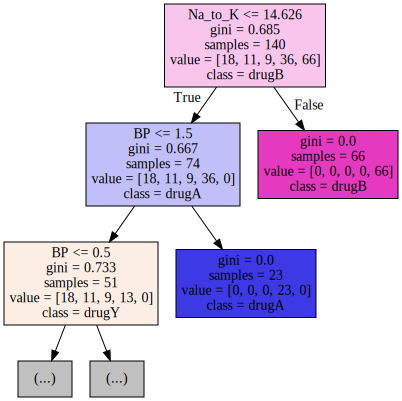

In [27]:
graph = Source(tree.export_graphviz(dtree ,feature_names = labels, class_names = Y.unique(), max_depth = 2, filled = True))
display(SVG(graph.pipe(format='svg')))